In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import accuracy_score as ac
from sklearn import tree
import matplotlib.pyplot as plt

In [19]:
df= pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [20]:
cls = []
for i in range(0,df.shape[0]):
    if df["Taxable.Income"][i]<=30000:
        cls.append("Risky")
    else:
        cls.append("Good")
df["Class"]=cls
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [21]:
lblen = LabelEncoder()
df["Undergrad"]=lblen.fit_transform(df["Undergrad"])
df["Marital.Status"]=lblen.fit_transform(df["Marital.Status"])
df["Urban"]=lblen.fit_transform(df["Urban"])
df["Class"]=lblen.fit_transform(df["Class"])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [22]:
x=df.iloc[:,:6]
y=df.iloc[:,6]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [24]:
model=RandomForestClassifier(n_estimators=2,max_depth=2,max_features=3,random_state=40)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [25]:
# Accuracy prediction
ac(y_test,y_pred)

1.0

In [26]:
# Cross validation score measure
kfold = KFold(n_splits=10)
results = cvs(model,x_train,y_train)

In [27]:
results.mean()

0.9738095238095237

In [28]:
model.base_estimator_.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(279.0, 407.70000000000005, 'Taxable.Income <= 30055.5\ngini = 0.314\nsamples = 420\nvalue = [338, 82]\nclass = Good'),
 Text(139.5, 135.89999999999998, 'gini = 0.0\nsamples = 82\nvalue = [0, 82]\nclass = Risky'),
 Text(418.5, 135.89999999999998, 'gini = 0.0\nsamples = 338\nvalue = [338, 0]\nclass = Good')]

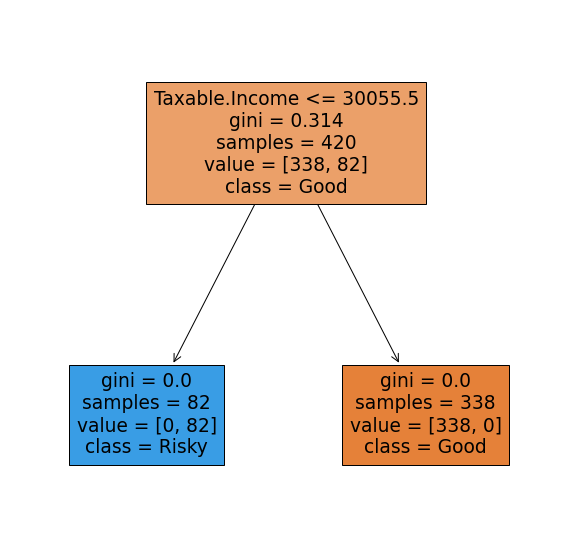

In [29]:
plt.figure(figsize=(10,10))
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn = ['Good','Risky']
tree.plot_tree(model.base_estimator_,feature_names=fn,class_names=cn,filled=True)